Indeed Job Board Web Scraping and Job Search Effciency

Team: Golam Imran, Indresh Muniraj and Vishnu Mohan

Problem Statement:
Where must fresh graduates look to apply in Colorado for Data science jobs and how well to prepare?
What information do fresh garduates need and can help them look for jobs at the right place?

We know that applying for jobs after graduations is very mentally exhaustive and time consuming. A large portion of time spent is lost in searching the right location, reading about which company has teh higher likelyhood to hire freshers. In addition to this, applicants are not sure if teh job is right for them as many dont read the full job discription. 

Data to work on will be collected through webscraping with the help of the module beautiful soup. Parsing through the indeed job board for specific information will enable us to display valueable information once it is transformed. 

Motivation:
We realize that almost all students are struggling with having quick and reliable information before applying for jobs. Many jobs are rejected (especially for international students) due to low hiring rates of certain companies, highly competitve location and security clearence issues (specific to international students). This motivated us to speed up the selection process of choosing where to apply and what to have before applying. 


Data Extraction and transformation:

Using Beautiful soup and inspection feature on the html page (indeed.com) We create dth extract() function to parse through each page with the beautiful soup cursor. 

The transform() function specified on what variables to store specific information and print into a dtaaframe. For example: company is a variable followed by "= item.find" is the key to instruct soup to fetch, information in "span" class_ .txt, the format of the information.
    

In [46]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib as plt

def extract(page):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36'}
    url = f'https://www.indeed.com/jobs?q=data%20scientist&l=CO&start={page}&vjk=10ffcb6d107cbd0a'
    r = requests.get(url, headers)
    soup = BeautifulSoup(r.content, 'html.parser')
    return soup


def transform(soup):
    divs = soup.find_all('div', class_ = 'cardOutline')
    keywords = ['Python', 'SQL', 'AWS', 'RESTFUL', 'Machine learning', 'Deep Learning', 'Text Mining', 'NLP', 'SAS', 'Tableau', 'Sagemaker', 'TensorFlow', 'Spark']
    for item in divs:
        title = item.find('a').text
        company = item.find('span', class_ ='companyName').text
        location = item.find('div', class_='companyLocation').text
        summary = item.find('table', class_ = 'jobCardShelfContainer big6_visualChanges').text
        try:
            rating = item.find('span',class_='ratingNumber').text
        except:
            rating = np.nan

                
        
         

        job = {
            'Title': title,
            'Company': company,
            'Location': location,
            'Summary': summary.replace('\n',""),
            'Rating': float(rating)
            
        }
        joblist.append(job)
    return


joblist = []
for i in range(0,200,10):
    print(f'Getting page, {i}')
    c = extract(0)
    transform(c)

df = pd.DataFrame(joblist)

print(df.head())


Getting page, 0
Getting page, 10
Getting page, 20
Getting page, 30
Getting page, 40
Getting page, 50
Getting page, 60
Getting page, 70
Getting page, 80
Getting page, 90
Getting page, 100
Getting page, 110
Getting page, 120
Getting page, 130
Getting page, 140
Getting page, 150
Getting page, 160
Getting page, 170
Getting page, 180
Getting page, 190
                                       Title                    Company  \
0  Data Scientist III (Remote Work Eligible)  Sierra Nevada Corporation   
1          Data Scientist Advanced Analytics             Intellibee Inc   
2                 Data Scientist - Aerospace                    Peraton   
3                    Data Scientist (Junior)                       BDSA   
4   Credit Strategy Analyst - Data Scientist          Funding Circle US   

                                            Location  \
0                      Remote in Englewood, CO 80113   
1                                         Denver, CO   
2    Remote in Colorado Springs,

Raw Data Collected into Dataframe
The dataframe consists of 300 entries, we have limitted our scraping to thsi number to avoid getting blocked for website scraping. 
The Dataframe consists of "Title", "Company", "Location", "Summary" and "Rating" of the company. 

In [47]:
df

,Title,Company,Location,Summary,Rating
0,Data Scientist III (Remote Work Eligible),Sierra Nevada Corporation,"Remote in Englewood, CO 80113",The status of applicable COVID-19 vaccination ...,3.6
1,Data Scientist Advanced Analytics,Intellibee Inc,"Denver, CO","Easily applyUrgently hiringPython, Scala and S...",NaN
2,Data Scientist - Aerospace,Peraton,"Remote in Colorado Springs, CO 80919+1 location",Ability to program and understand machine lear...,3.2
3,Data Scientist (Junior),BDSA,"Remote in Louisville, CO","For example, combining public weather data wit...",NaN
4,Credit Strategy Analyst - Data Scientist,Funding Circle US,"Denver, CO 80202 (Central Business District ar...",Provide insights and recommendations managemen...,3.3
...,...,...,...,...,...
295,Geospatial Data Scientist,Perennial,"Remote in Boulder, CO+1 location",Easily applyExperience applying machine learni...,NaN
296,"Staff Data Scientist, Virtual HQ",Slack,"Hybrid remote in Denver, CO 80202",We are hiring experienced data scientists for ...,3.8
297,Data Scientist,Visa,"Highlands Ranch, CO",Extract and understand data to form an opinion...,3.9
298,Data Scientist,Techstars,"Remote in Boulder, CO 80302",Demonstrated ability to independently build pr...,4.6


Data inspection:

In [48]:
df.dtypes

Title        object
Company      object
Location     object
Summary      object
Rating      float64
dtype: object

In [49]:
df.isnull().sum()

Title        0
Company      0
Location     0
Summary      0
Rating      86
dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     300 non-null    object 
 1   Company   300 non-null    object 
 2   Location  300 non-null    object 
 3   Summary   300 non-null    object 
 4   Rating    214 non-null    float64
dtypes: float64(1), object(4)
memory usage: 11.8+ KB


In [51]:
df.describe()

,Rating
count,214.000000
mean,3.838785
std,0.394493
min,3.200000
25%,3.600000
50%,3.800000
75%,4.100000
max,4.600000


In [52]:
df.shape

(300, 5)

In [53]:
df.drop_duplicates()

,Title,Company,Location,Summary,Rating
0,Data Scientist III (Remote Work Eligible),Sierra Nevada Corporation,"Remote in Englewood, CO 80113",The status of applicable COVID-19 vaccination ...,3.6
1,Data Scientist Advanced Analytics,Intellibee Inc,"Denver, CO","Easily applyUrgently hiringPython, Scala and S...",NaN
2,Data Scientist - Aerospace,Peraton,"Remote in Colorado Springs, CO 80919+1 location",Ability to program and understand machine lear...,3.2
3,Data Scientist (Junior),BDSA,"Remote in Louisville, CO","For example, combining public weather data wit...",NaN
4,Credit Strategy Analyst - Data Scientist,Funding Circle US,"Denver, CO 80202 (Central Business District ar...",Provide insights and recommendations managemen...,3.3
5,"Staff Data Scientist, Virtual HQ - Slack",Salesforce,"Hybrid remote in Denver, CO",Evangelize evidence-based decision making by p...,4.3
6,Data Scientist,APR Consulting Inc,"Remote in Aurora, CO 80010",Easily applyExperience creating and using adva...,4.1
7,Data Scientist I - NEON,Battelle,"Boulder, CO 80301",A 30+ year project dedicated to understanding ...,3.8
8,Data Scientist - Utility Reliability (Jr - Sr)...,E Source,"Hybrid remote in Denver, CO",Easily applyE Source develops groundbreaking d...,4.0
9,Data Scientist,CyberCoders,"Remote in Denver, CO 80238+1 location",Easily applyCollaborate with analytics teams t...,3.6


In [54]:
df.shape

(300, 5)

In [55]:
df['Title'].unique()

array(['Data Scientist III (Remote Work Eligible)',
       'Data Scientist Advanced Analytics', 'Data Scientist - Aerospace',
       'Data Scientist (Junior)',
       'Credit Strategy Analyst - Data Scientist',
       'Staff Data Scientist, Virtual HQ - Slack', 'Data Scientist',
       'Data Scientist I - NEON',
       'Data Scientist - Utility Reliability (Jr - Sr) - REMOTE',
       'Geospatial Data Scientist', 'Staff Data Scientist, Virtual HQ',
       'Lead Data Scientist',
       'Front End Engineer, MADS- Measurement and Data Science'],
      dtype=object)

In [56]:
df['Location'].unique()

array(['Remote in Englewood, CO 80113', 'Denver, CO',
       'Remote in Colorado Springs, CO 80919+1 location',
       'Remote in Louisville, CO',
       'Denver, CO 80202 (Central Business District area)+1 location',
       'Hybrid remote in Denver, CO', 'Remote in Aurora, CO 80010',
       'Boulder, CO 80301', 'Remote in Denver, CO 80238+1 location',
       'Remote in Boulder, CO', 'Hybrid remote in Denver, CO 80202',
       'Highlands Ranch, CO+1 location', 'Remote in Boulder, CO 80302',
       'Remote in Colorado Springs, CO 80919',
       'Remote in Denver, CO 80238',
       'Denver, CO 80202 (Central Business District area)',
       'Remote in Boulder, CO+1 location', 'Highlands Ranch, CO',
       'Colorado Springs, CO 80919 (Northwest Colorado Springs area)',
       'Boulder, CO'], dtype=object)

Data Cleaning:
The importance of data cleaning is cruitial to simplify the existing data set for a much cleaner and user friendly experinece

Scope:

"location" column can be reduced to only the name of the city or town as our indeed search was filtered to state: CO 

"Title" column can be simplified by removing extra braces and information that is already present in the summary 

"Rating" column has many missing entries for which we can replace the null values with the average of all the entries


In [57]:
#Removing everything and including "," in the location column 
df['Location'] = df['Location'].str.split(',').str[0] 

In [58]:
df

,Title,Company,Location,Summary,Rating
0,Data Scientist III (Remote Work Eligible),Sierra Nevada Corporation,Remote in Englewood,The status of applicable COVID-19 vaccination ...,3.6
1,Data Scientist Advanced Analytics,Intellibee Inc,Denver,"Easily applyUrgently hiringPython, Scala and S...",NaN
2,Data Scientist - Aerospace,Peraton,Remote in Colorado Springs,Ability to program and understand machine lear...,3.2
3,Data Scientist (Junior),BDSA,Remote in Louisville,"For example, combining public weather data wit...",NaN
4,Credit Strategy Analyst - Data Scientist,Funding Circle US,Denver,Provide insights and recommendations managemen...,3.3
...,...,...,...,...,...
295,Geospatial Data Scientist,Perennial,Remote in Boulder,Easily applyExperience applying machine learni...,NaN
296,"Staff Data Scientist, Virtual HQ",Slack,Hybrid remote in Denver,We are hiring experienced data scientists for ...,3.8
297,Data Scientist,Visa,Highlands Ranch,Extract and understand data to form an opinion...,3.9
298,Data Scientist,Techstars,Remote in Boulder,Demonstrated ability to independently build pr...,4.6


In [59]:
#Removing everything and including "Remote" in the location column 
df['Location'] = df['Location'].str.split('Remote').str[0]

In [60]:
df

,Title,Company,Location,Summary,Rating
0,Data Scientist III (Remote Work Eligible),Sierra Nevada Corporation,,The status of applicable COVID-19 vaccination ...,3.6
1,Data Scientist Advanced Analytics,Intellibee Inc,Denver,"Easily applyUrgently hiringPython, Scala and S...",NaN
2,Data Scientist - Aerospace,Peraton,,Ability to program and understand machine lear...,3.2
3,Data Scientist (Junior),BDSA,,"For example, combining public weather data wit...",NaN
4,Credit Strategy Analyst - Data Scientist,Funding Circle US,Denver,Provide insights and recommendations managemen...,3.3
...,...,...,...,...,...
295,Geospatial Data Scientist,Perennial,,Easily applyExperience applying machine learni...,NaN
296,"Staff Data Scientist, Virtual HQ",Slack,Hybrid remote in Denver,We are hiring experienced data scientists for ...,3.8
297,Data Scientist,Visa,Highlands Ranch,Extract and understand data to form an opinion...,3.9
298,Data Scientist,Techstars,,Demonstrated ability to independently build pr...,4.6


In [61]:
#Using the regex function to replace empty entries with "NaN"
df = df.replace(r'^\s*$',np.nan, regex = True)

In [62]:
df

,Title,Company,Location,Summary,Rating
0,Data Scientist III (Remote Work Eligible),Sierra Nevada Corporation,NaN,The status of applicable COVID-19 vaccination ...,3.6
1,Data Scientist Advanced Analytics,Intellibee Inc,Denver,"Easily applyUrgently hiringPython, Scala and S...",NaN
2,Data Scientist - Aerospace,Peraton,NaN,Ability to program and understand machine lear...,3.2
3,Data Scientist (Junior),BDSA,NaN,"For example, combining public weather data wit...",NaN
4,Credit Strategy Analyst - Data Scientist,Funding Circle US,Denver,Provide insights and recommendations managemen...,3.3
...,...,...,...,...,...
295,Geospatial Data Scientist,Perennial,NaN,Easily applyExperience applying machine learni...,NaN
296,"Staff Data Scientist, Virtual HQ",Slack,Hybrid remote in Denver,We are hiring experienced data scientists for ...,3.8
297,Data Scientist,Visa,Highlands Ranch,Extract and understand data to form an opinion...,3.9
298,Data Scientist,Techstars,NaN,Demonstrated ability to independently build pr...,4.6


In [63]:
#Using fillna function to replace NaN with "Remote"
df.Location = df.Location.fillna("Remote")

In [64]:
df

,Title,Company,Location,Summary,Rating
0,Data Scientist III (Remote Work Eligible),Sierra Nevada Corporation,Remote,The status of applicable COVID-19 vaccination ...,3.6
1,Data Scientist Advanced Analytics,Intellibee Inc,Denver,"Easily applyUrgently hiringPython, Scala and S...",NaN
2,Data Scientist - Aerospace,Peraton,Remote,Ability to program and understand machine lear...,3.2
3,Data Scientist (Junior),BDSA,Remote,"For example, combining public weather data wit...",NaN
4,Credit Strategy Analyst - Data Scientist,Funding Circle US,Denver,Provide insights and recommendations managemen...,3.3
...,...,...,...,...,...
295,Geospatial Data Scientist,Perennial,Remote,Easily applyExperience applying machine learni...,NaN
296,"Staff Data Scientist, Virtual HQ",Slack,Hybrid remote in Denver,We are hiring experienced data scientists for ...,3.8
297,Data Scientist,Visa,Highlands Ranch,Extract and understand data to form an opinion...,3.9
298,Data Scientist,Techstars,Remote,Demonstrated ability to independently build pr...,4.6


In [65]:
#Removing everything and including "Hybrid" in the location column 
df['Location'] = df['Location'].str.split('Hybrid').str[0]

In [66]:
df

,Title,Company,Location,Summary,Rating
0,Data Scientist III (Remote Work Eligible),Sierra Nevada Corporation,Remote,The status of applicable COVID-19 vaccination ...,3.6
1,Data Scientist Advanced Analytics,Intellibee Inc,Denver,"Easily applyUrgently hiringPython, Scala and S...",NaN
2,Data Scientist - Aerospace,Peraton,Remote,Ability to program and understand machine lear...,3.2
3,Data Scientist (Junior),BDSA,Remote,"For example, combining public weather data wit...",NaN
4,Credit Strategy Analyst - Data Scientist,Funding Circle US,Denver,Provide insights and recommendations managemen...,3.3
...,...,...,...,...,...
295,Geospatial Data Scientist,Perennial,Remote,Easily applyExperience applying machine learni...,NaN
296,"Staff Data Scientist, Virtual HQ",Slack,,We are hiring experienced data scientists for ...,3.8
297,Data Scientist,Visa,Highlands Ranch,Extract and understand data to form an opinion...,3.9
298,Data Scientist,Techstars,Remote,Demonstrated ability to independently build pr...,4.6


In [67]:
#Using the regex function to replace empty entries with "NaN"
df = df.replace(r'^\s*$',np.nan, regex = True)

In [68]:
df

,Title,Company,Location,Summary,Rating
0,Data Scientist III (Remote Work Eligible),Sierra Nevada Corporation,Remote,The status of applicable COVID-19 vaccination ...,3.6
1,Data Scientist Advanced Analytics,Intellibee Inc,Denver,"Easily applyUrgently hiringPython, Scala and S...",NaN
2,Data Scientist - Aerospace,Peraton,Remote,Ability to program and understand machine lear...,3.2
3,Data Scientist (Junior),BDSA,Remote,"For example, combining public weather data wit...",NaN
4,Credit Strategy Analyst - Data Scientist,Funding Circle US,Denver,Provide insights and recommendations managemen...,3.3
...,...,...,...,...,...
295,Geospatial Data Scientist,Perennial,Remote,Easily applyExperience applying machine learni...,NaN
296,"Staff Data Scientist, Virtual HQ",Slack,NaN,We are hiring experienced data scientists for ...,3.8
297,Data Scientist,Visa,Highlands Ranch,Extract and understand data to form an opinion...,3.9
298,Data Scientist,Techstars,Remote,Demonstrated ability to independently build pr...,4.6


In [69]:
df.Location = df.Location.fillna("Hybrid")

In [70]:
df

,Title,Company,Location,Summary,Rating
0,Data Scientist III (Remote Work Eligible),Sierra Nevada Corporation,Remote,The status of applicable COVID-19 vaccination ...,3.6
1,Data Scientist Advanced Analytics,Intellibee Inc,Denver,"Easily applyUrgently hiringPython, Scala and S...",NaN
2,Data Scientist - Aerospace,Peraton,Remote,Ability to program and understand machine lear...,3.2
3,Data Scientist (Junior),BDSA,Remote,"For example, combining public weather data wit...",NaN
4,Credit Strategy Analyst - Data Scientist,Funding Circle US,Denver,Provide insights and recommendations managemen...,3.3
...,...,...,...,...,...
295,Geospatial Data Scientist,Perennial,Remote,Easily applyExperience applying machine learni...,NaN
296,"Staff Data Scientist, Virtual HQ",Slack,Hybrid,We are hiring experienced data scientists for ...,3.8
297,Data Scientist,Visa,Highlands Ranch,Extract and understand data to form an opinion...,3.9
298,Data Scientist,Techstars,Remote,Demonstrated ability to independently build pr...,4.6


In [71]:
df['Location'].unique()

array(['Remote', 'Denver', 'Hybrid', 'Boulder', 'Highlands Ranch',
       'Colorado Springs'], dtype=object)

In [72]:
#replacing NaN values of Ratings to the mean of all ratings values
df['Rating'].fillna(value=round(df['Rating'].mean(),1),inplace=True)

In [73]:
df

,Title,Company,Location,Summary,Rating
0,Data Scientist III (Remote Work Eligible),Sierra Nevada Corporation,Remote,The status of applicable COVID-19 vaccination ...,3.6
1,Data Scientist Advanced Analytics,Intellibee Inc,Denver,"Easily applyUrgently hiringPython, Scala and S...",3.8
2,Data Scientist - Aerospace,Peraton,Remote,Ability to program and understand machine lear...,3.2
3,Data Scientist (Junior),BDSA,Remote,"For example, combining public weather data wit...",3.8
4,Credit Strategy Analyst - Data Scientist,Funding Circle US,Denver,Provide insights and recommendations managemen...,3.3
...,...,...,...,...,...
295,Geospatial Data Scientist,Perennial,Remote,Easily applyExperience applying machine learni...,3.8
296,"Staff Data Scientist, Virtual HQ",Slack,Hybrid,We are hiring experienced data scientists for ...,3.8
297,Data Scientist,Visa,Highlands Ranch,Extract and understand data to form an opinion...,3.9
298,Data Scientist,Techstars,Remote,Demonstrated ability to independently build pr...,4.6


In [74]:
df.isnull().sum()

Title       0
Company     0
Location    0
Summary     0
Rating      0
dtype: int64

In [75]:
#Similarly for title
df['Title'] = df['Title'].str.split('-').str[0]
df['Title'] = df['Title'].str.split(',').str[0]
df['Title'] = df['Title'].str.split('(').str[0]

In [76]:
df

,Title,Company,Location,Summary,Rating
0,Data Scientist III,Sierra Nevada Corporation,Remote,The status of applicable COVID-19 vaccination ...,3.6
1,Data Scientist Advanced Analytics,Intellibee Inc,Denver,"Easily applyUrgently hiringPython, Scala and S...",3.8
2,Data Scientist,Peraton,Remote,Ability to program and understand machine lear...,3.2
3,Data Scientist,BDSA,Remote,"For example, combining public weather data wit...",3.8
4,Credit Strategy Analyst,Funding Circle US,Denver,Provide insights and recommendations managemen...,3.3
...,...,...,...,...,...
295,Geospatial Data Scientist,Perennial,Remote,Easily applyExperience applying machine learni...,3.8
296,Staff Data Scientist,Slack,Hybrid,We are hiring experienced data scientists for ...,3.8
297,Data Scientist,Visa,Highlands Ranch,Extract and understand data to form an opinion...,3.9
298,Data Scientist,Techstars,Remote,Demonstrated ability to independently build pr...,4.6


In [77]:
df['Title'].unique()

array(['Data Scientist III ', 'Data Scientist Advanced Analytics',
       'Data Scientist ', 'Credit Strategy Analyst ',
       'Staff Data Scientist', 'Data Scientist', 'Data Scientist I ',
       'Geospatial Data Scientist', 'Lead Data Scientist',
       'Front End Engineer'], dtype=object)

Analysis of extracted and cleaned data

In [78]:
df_company_rating = df[['Company','Rating']]

In [79]:
df_company_rating=  df_company_rating.drop_duplicates()
df_company_rating=df_company_rating.reset_index(drop=True)

<AxesSubplot:xlabel='Company'>

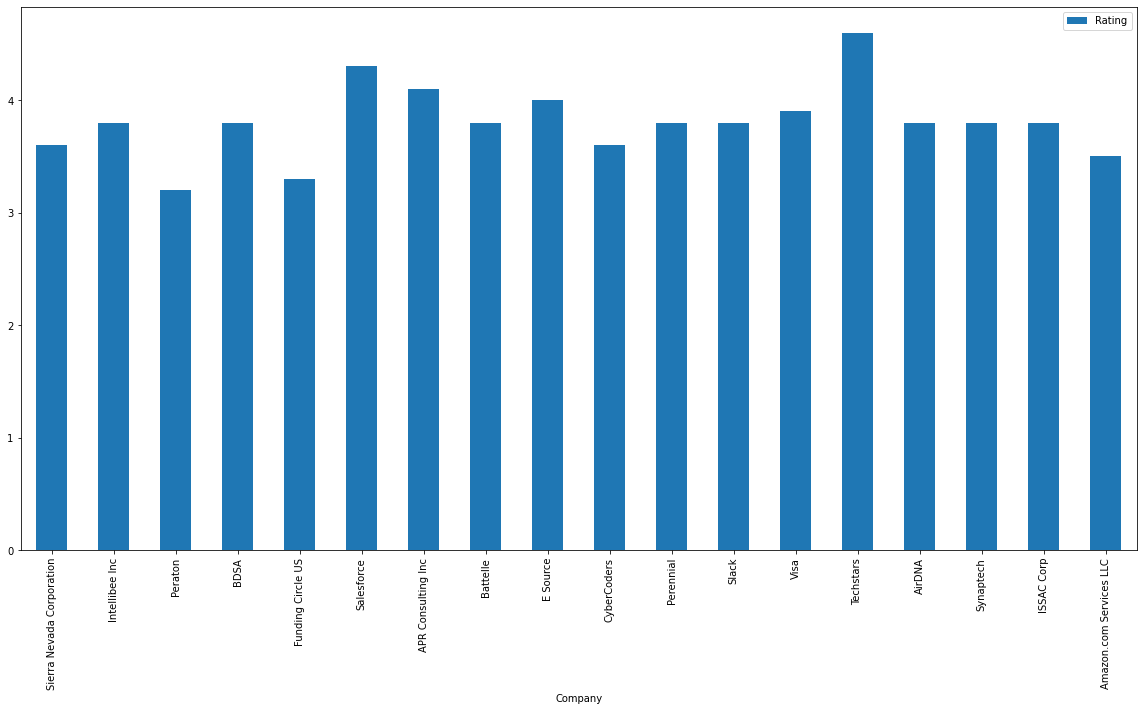

In [80]:
df_company_rating.plot.bar(x='Company', y='Rating', figsize=(20,10))

Bar graph above shows the rating of each company
This gives applicats a reasonable understanding of most desirable companies to work for.Techstars, Salesforce amd APR Counseling Inc are desirabel companies to work for Data Scientists

In [81]:
df_new = pd.DataFrame.from_dict(df.groupby(['Company'])['Company'].count().to_dict(), orient ='index').reset_index()
df_new=df_new.rename(columns={"index":"Company", 0:"Openings"})
df_new

,Company,Openings
0,APR Consulting Inc,17
1,AirDNA,20
2,Amazon.com Services LLC,2
3,BDSA,20
4,Battelle,20
5,CyberCoders,17
6,E Source,20
7,Funding Circle US,20
8,ISSAC Corp,3
9,Intellibee Inc,20


<AxesSubplot:xlabel='Company'>

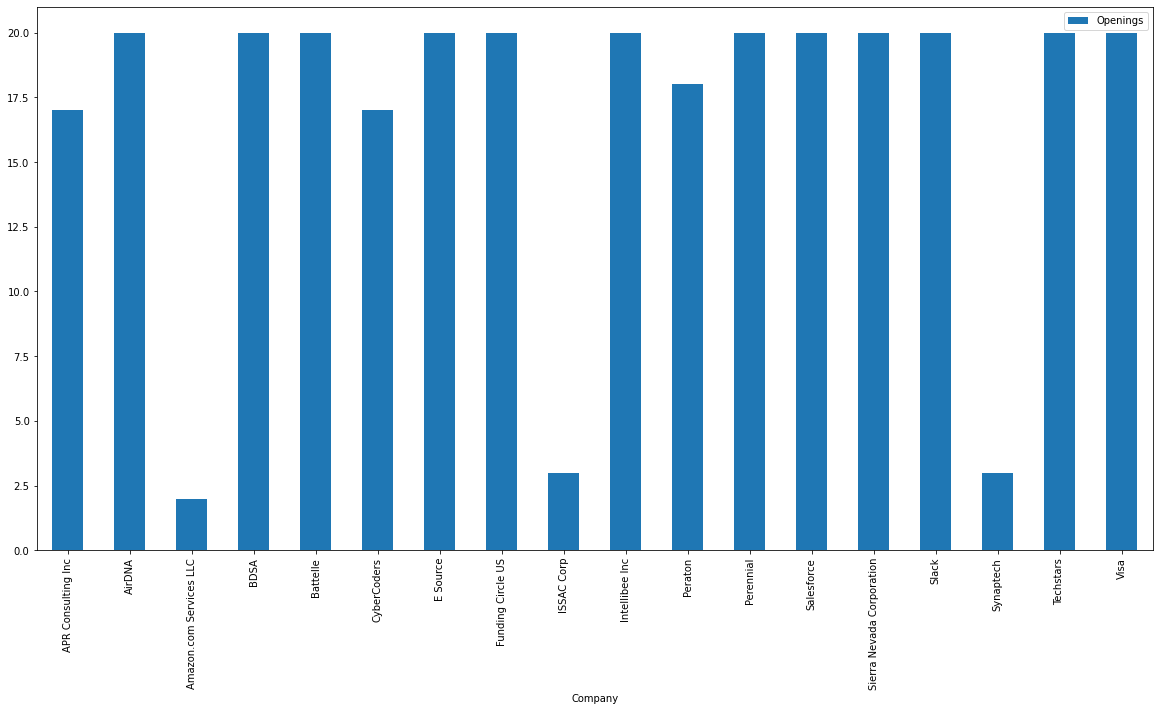

In [82]:
df_new.plot.bar(x='Company', y='Openings', figsize=(20,10))

The figure above shows the opening each company has in Denver for Data Scientist position. It can be infered that most of eth companies have around 20 openings, except Amazon.com servoce and ISSAC Corp.

In [83]:
df_loc_count = pd.DataFrame.from_dict(df.groupby(['Location'])['Location'].count().to_dict(), orient ='index').reset_index()

In [84]:
df_loc_count=df_loc_count.rename(columns={"index":"Location", 0:"Openings"})

<AxesSubplot:xlabel='Location'>

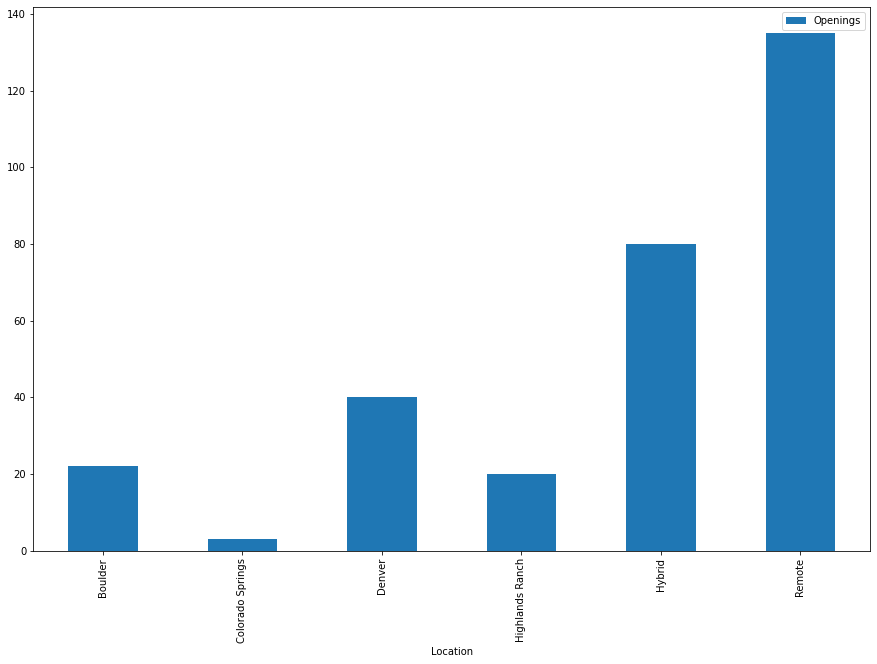

In [85]:
df_loc_count.plot.bar(x='Location', y='Openings', figsize=(15,10))

The above figure distributes job openings with location. Most of the data scientist positions are offered remote or hybrid and other locations such as denver and boulder do have quite reasonable number of job openings

In [86]:
import matplotlib.pyplot as plt


In [87]:
keywords = ['Python', 'SQL', 'AWS','Qlik', 'RESTFUL', 'Machine learning','ML', 'Deep Learning', 'Text Mining', 'NLP', 'SAS', 'Tableau', 'Sagemaker', 'TensorFlow', 'Spark']
keyword_count = []
for i in keywords:
    count = 0
    for j in df.Summary:
        if i.lower() in j.lower():
            count += 1
    keyword_count.append(count)
print("Top Two Skills are:")
print()
print(keywords[keyword_count.index(max(keyword_count))])
keyword_count[keyword_count.index(max(keyword_count))] = 0
print(keywords[keyword_count.index(max(keyword_count))])
keyword_count[keyword_count.index(max(keyword_count))] = 0
#print(keywords[keyword_count.index(max(keyword_count))])
#keyword_count[keyword_count.index(max(keyword_count))] = 0


Top Two Skills are:

Machine learning
Python


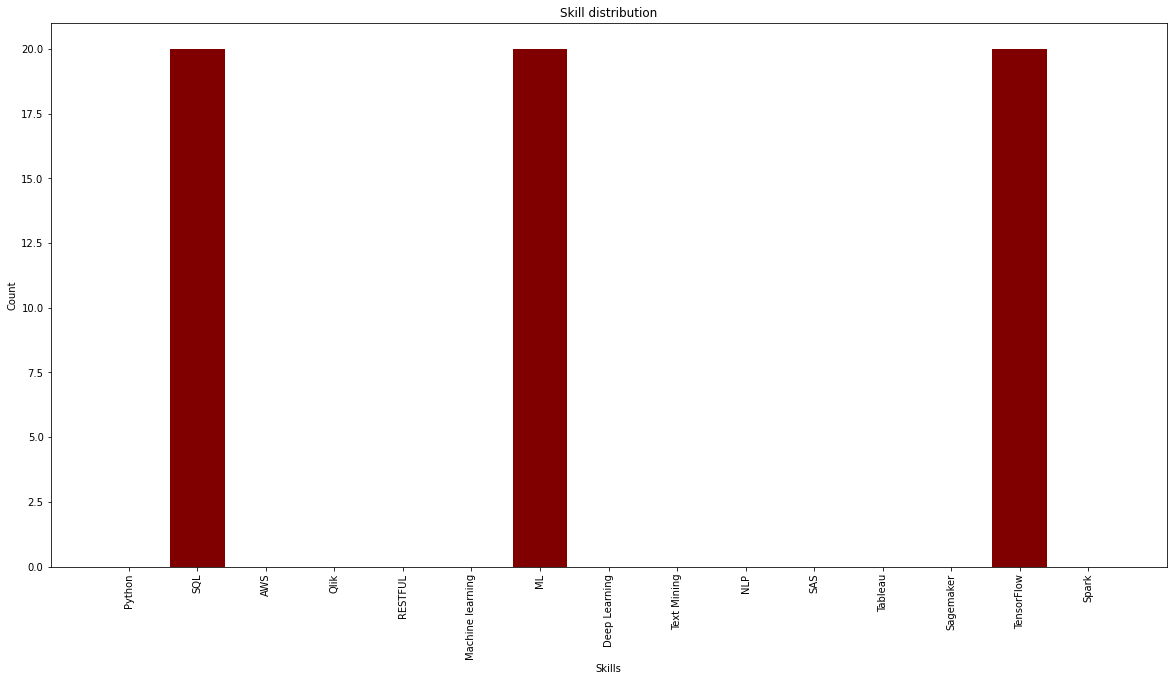

In [88]:
fig = plt.figure(figsize = (20, 10))
 
plt.bar(keywords, keyword_count, color ='maroon')
plt.xticks(rotation=90)
plt.xlabel("Skills")
plt.ylabel("Count")
plt.title("Skill distribution")
plt.show()

The Figure above shows teh required skills to be able to apply for data scientist posyiton. We can infer from the graph that SQL, ML and Tensor flow are highly important skills. 

All four plots gives strong guidance to effectively apply for job positions. Understanding the plots can increase the chance of acquiring an interview which will in turn increase the probability of landing a fulltime position. The Rating graph gives a good dsense of which could be the most employee friendly, The opening to comapny bar graph can enable applicants to apply to companies that have high demand, hence more acceptance to fill needs, Location graph to count of opening gives a good sense of which location would have highest density and thus more opportunities. Finally the Skills to count plot give an idea of what employers are looking for. 

The exploratory data analysis proves that there is definately significant information in the data collected that can add value to decision making when applying to Data Scientist positions. The codes are reusable for any job positions in any location, proving it robust. Since the data collected is of real time and is constantly updated on the job board, the results are reliable and up to date.